## PCA challenge ;)

In [143]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [144]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/dataset.csv.zip',index_col=0, header=None).T
dataset = dataset.rename(columns={np.nan: 'id'})
dataset = dataset.set_index('id')
dataset

,Feature00001,Feature00002,Feature00003,Feature00004,Feature00005,Feature00006,Feature00007,Feature00008,Feature00009,Feature00010,...,Feature24681,Feature24682,Feature24683,Feature24684,Feature24685,Feature24686,Feature24687,Feature24688,Feature24689,Feature24690
id,,,,,,,,,,,,,,,,,,,,,
Observation1,2,4,0,0,19,7,0,4,7,86,...,0,0,0,0,0,0,4,134,0,0
Observation2,4,1,1,0,10,5,0,1,5,53,...,0,0,0,0,0,0,4,118,0,0
Observation3,18,3,4,0,19,1,2,12,2,86,...,0,4,0,0,0,0,3,98,0,0
Observation4,24,1,2,0,13,0,1,18,1,78,...,0,2,0,0,0,0,1,80,0,0
Observation5,7,5,0,0,50,31,0,21,30,257,...,0,2,0,0,0,2,11,372,0,0
Observation6,4,4,5,0,57,26,0,19,32,254,...,0,3,0,0,0,0,20,461,0,0
Observation7,93,9,2,0,45,12,0,127,75,434,...,0,6,0,0,0,3,20,417,0,0
Observation8,77,4,6,0,58,9,0,98,42,454,...,0,7,0,0,0,1,15,525,0,0


# Principal Component Analysis

In [145]:

#Standarize the data
x = dataset.values                      
dataset_std = StandardScaler().fit_transform(x)     

dataset_std[0:7]


array([[-0.79345707,  0.05277798, -1.1785113 , ..., -0.81673722,
         0.        ,  0.        ],
       [-0.73385466, -1.21389357, -0.70710678, ..., -0.90900762,
         0.        ,  0.        ],
       [-0.3166378 , -0.36944587,  0.70710678, ..., -1.02434562,
         0.        ,  0.        ],
       ...,
       [-0.64445105,  0.47500183, -1.1785113 , ...,  0.55578499,
         0.        ,  0.        ],
       [-0.73385466,  0.05277798,  1.1785113 , ...,  1.0690391 ,
         0.        ,  0.        ],
       [ 1.91845254,  2.16389724, -0.23570226, ...,  0.8152955 ,
         0.        ,  0.        ]])

In [83]:
#Chooing PCA bumber of components
pca = PCA(n_components=7).fit(dataset_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


#Consider the necessary number of components to explain at least a 95% of the variance.
pc_explained1 = pca.explained_variance_ratio_.tolist()[0:4]
print('95% Accumulated variation: {}'.format(np.sum(pc_explained1)))
pca95 = PCA(n_components=4).fit(dataset_std)

#Consider the necessary number of components to explain at least a 85% of the variance.
pc_explained2 = pca.explained_variance_ratio_.tolist()[0:2]
print('85% Accumulated variation: {}'.format(np.sum(pc_explained2)))
pca85 = PCA(n_components=2).fit(dataset_std)

Explained variation per principal component: [0.73135743 0.13774563 0.05513513 0.0354783  0.01555362 0.0127137
 0.01201619]
95% Accumulated variation: 0.9597164927748475
85% Accumulated variation: 0.8691030584541986


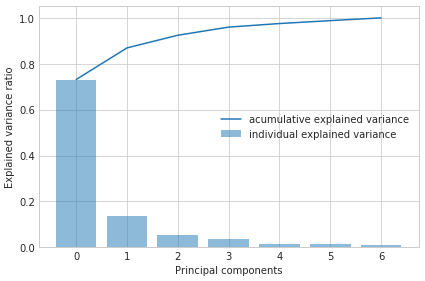

In [147]:
#PCA Visualization of the invidual components and their acumulative explained variance
pc_explainedbase = pca.explained_variance_ratio_.tolist()

with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(len(pc_explainedbase)), pc_explainedbase, alpha=0.5, align='center',
          label='individual explained variance')
  plt.plot(range(len(pc_explainedbase)), np.cumsum(pc_explainedbase),
            label='acumulative explained variance')

  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

In [85]:
#Reducing dimensions to 4 
d4_pca = pca95.transform(dataset_std)
print(d4_pca.shape)

#Visualization 1
df1_pca = pd.DataFrame(data = d4_pca
             , columns = ['pc 1', 'pc 2','pc 3','pc 4'])

df1_pca.head()



#Reducing dimensions to 2
d2_pca = pca85.transform(dataset_std)
print(d2_pca.shape)

#Visualization 1
df2_pca = pd.DataFrame(data = d2_pca
             , columns = ['pc 1', 'pc 2'])

df2_pca.head()


(8, 4)
(8, 2)


,pc 1,pc 2
0,-108.185893,1.665319
1,-118.173926,-2.646125
2,-109.181831,-30.819712
3,-105.873653,-32.613236
4,56.854967,72.057560


Text(0.5, 0.98, '95% Variance')

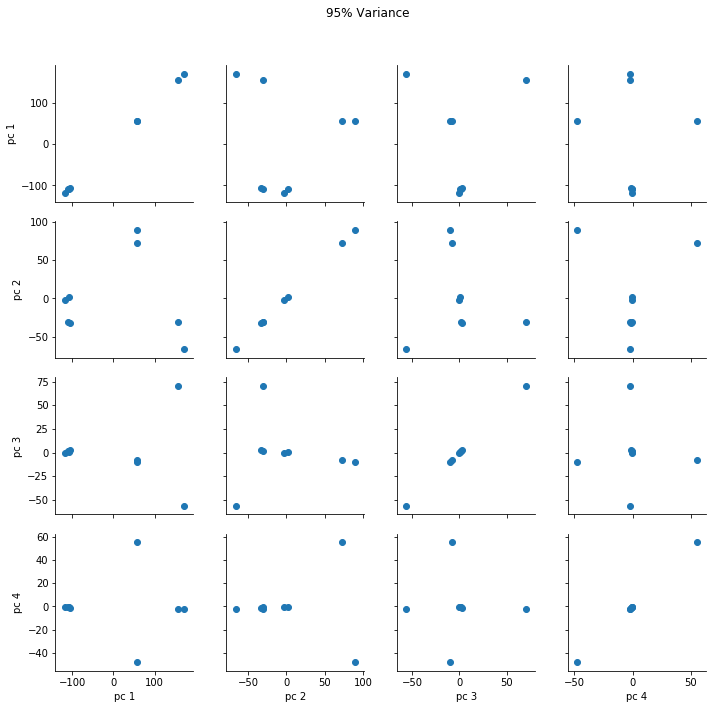

In [193]:
#Plotting components with 95% variance - 4 dimensions
PCA_95 = sns.PairGrid(df1_pca)
PCA_95.map(plt.scatter);
plt.subplots_adjust(top=0.90)
PCA_95.fig.suptitle('95% Variance')


<Figure size 432x288 with 0 Axes>

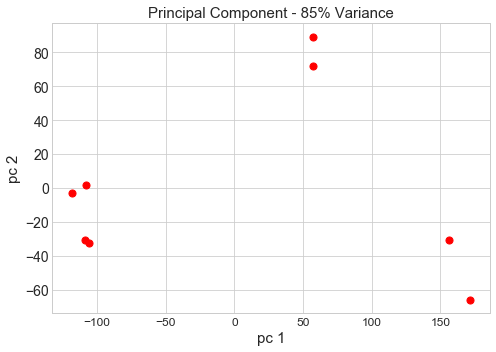

In [194]:
#Plotting components with 85% variance - 2 dimensions

with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.figure(figsize=(7,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('pc 1',fontsize=15)
  plt.ylabel('pc 2',fontsize=15)
  plt.title("Principal Component - 85% Variance",fontsize=15)
  plt.scatter(df2_pca.iloc[:,0],
                  df2_pca.iloc[:,1], 
                  c = 'r', alpha=1, s = 50)
  plt.tight_layout()
  plt.show()